In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, matthews_corrcoef

In [3]:
mcorrs = []
for mouse in mousenums:
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    mpos = rescale_epm_mpos(track['mouse_positionMS'], behav)
    
    oInd = behav['openInd']
    cInd = behav['closedInd']
    
    keep = np.zeros(calc.shape[0], dtype='bool')
    keep[oInd] = 1
    keep[cInd] = 1
    
    y0 = np.zeros(calc.shape[0])
    y0[oInd] = 1
    
    calc2 = calc[keep]
    y = y0[keep]
    
    y0[cInd] = -1
    
    trteInds = np.zeros(calc.shape[0])
    keepInds = np.nonzero(keep)[0]
    
    indsTr, indsTe = getinterleavedinds(450, 75, calc2.shape[0])
    #indsTr = np.arange(int(calc2.shape[0]/2))
    #indsTe = np.arange(int(calc2.shape[0]/2)+75, calc2.shape[0])
    
    trteInds[keepInds[indsTr]] = 1 #train
    trteInds[keepInds[indsTe]] = 2 #test
    
    xtr = calc2[indsTr]
    ytr = y[indsTr]
    xte = calc2[indsTe]
    yte = y[indsTe]
    
    svc = SVC(class_weight='balanced')
    svc.fit(xtr, ytr)
    yp = svc.predict(xte)
    print(mouse, np.round(np.mean(yp==yte), 3), np.round(f1_score(yte, yp), 3), np.round(matthews_corrcoef(yte, yp), 3))
    
    mcorrs.append(matthews_corrcoef(yte, yp))
    
    yp0 = svc.predict(calc)
    df0 = svc.decision_function(calc)

230 0.964 0.856 0.843
355 0.949 0.861 0.84
358 0.945 0.664 0.651
362 0.867 0.825 0.721
673 0.945 0.94 0.894
674 0.854 0.748 0.648
816 0.949 0.88 0.854
825 0.96 0.863 0.847


In [4]:
mcorrs

[0.8427914139021303,
 0.8399986184677244,
 0.6508054959764683,
 0.7207819980619403,
 0.8940539791624642,
 0.6481230534958498,
 0.8543871062325666,
 0.8467084292017183]

In [5]:
mouse = '355'
track, neur, behav = getdicts(foldnames, mouse, 'epm')
calc = getcalc(foldnames, mouse, 'epm')
calc = zscore(calc)

oInd = behav['openInd']
cInd = behav['closedInd']

keep = np.zeros(calc.shape[0], dtype='bool')
keep[oInd] = 1
keep[cInd] = 1

y0 = np.zeros(calc.shape[0])
y0[oInd] = 1

calc2 = calc[keep]
y = y0[keep]

y0[cInd] = -1

trteInds = np.zeros(calc.shape[0])
keepInds = np.nonzero(keep)[0]

indsTr, indsTe = getinterleavedinds(450, 75, calc2.shape[0])

trteInds[keepInds[indsTr]] = 1 #train
trteInds[keepInds[indsTe]] = 2 #test

xtr = calc2[indsTr]
ytr = y[indsTr]
xte = calc2[indsTe]
yte = y[indsTe]

svc = SVC(class_weight='balanced')
svc.fit(xtr, ytr)
yp = svc.predict(xte)
print(mouse, np.round(np.mean(yp==yte), 3), np.round(f1_score(yte, yp), 3), np.round(matthews_corrcoef(yte, yp), 3))

yp0 = svc.predict(calc)
df0 = svc.decision_function(calc)

355 0.949 0.861 0.84


In [6]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches

In [7]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

In [8]:
col0 = np.array([[0, 0, 1, 1],
               [1, 0, 0, 1]])
cmp0 = ListedColormap(col0)

col1 = np.array([[0, 0, 1, 1],
                [1, 0.95, 0.3, 1],
               [1, 0, 0, 1]])
cmp1 = ListedColormap(col1)

col2 = np.array([[1, 1, 1, 1],
               [0.6, 0, 0.6, 1],
               [0, 1, 0, 1]])
cmp2 = ListedColormap(col2)

In [9]:
xy = np.hstack([np.arange(yp0.size).reshape((-1, 1))/7.5/60, (-3)*np.ones(yp0.size).reshape((-1, 1))])

In [10]:
xy1 = np.hstack([np.arange(yp0.size).reshape((-1, 1))/7.5/60, (-0.3)*np.ones(yp0.size).reshape((-1, 1))])

In [11]:
ll = 2400
hh = 4800

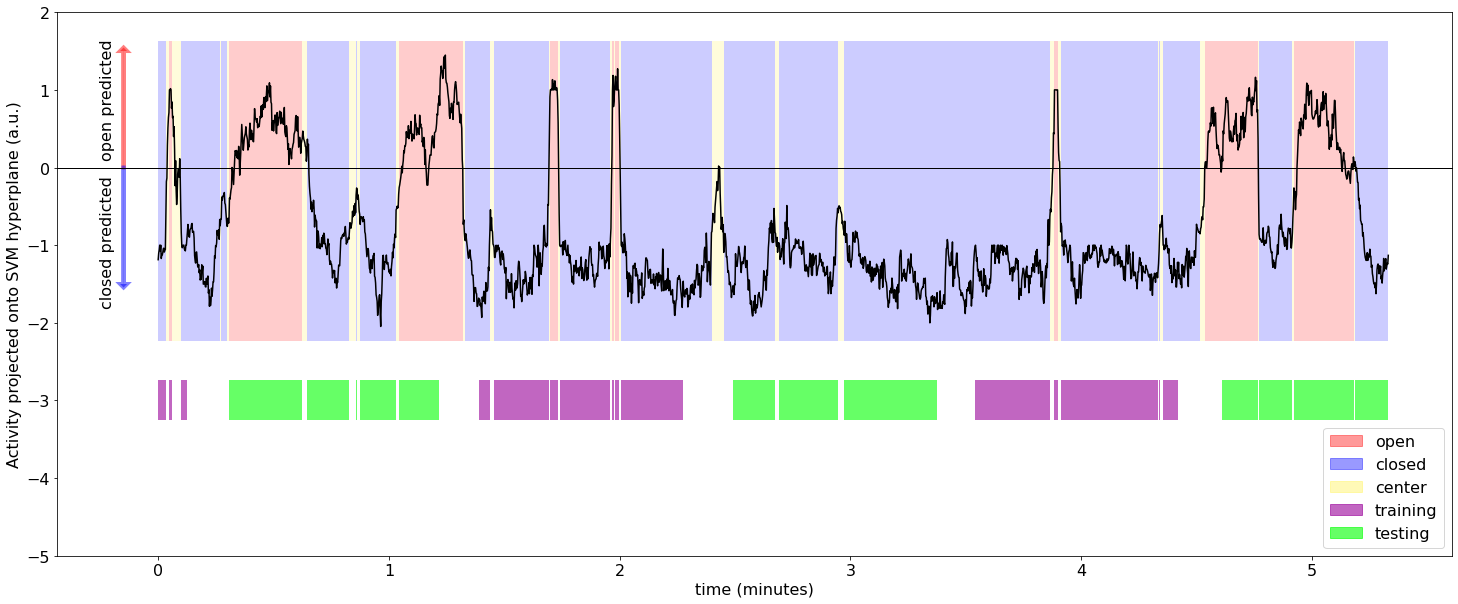

In [12]:
# mouse 355
fig = plt.figure(figsize=(25, 10))
ax = plt.gca()
xy0 = np.hstack([np.arange(yp0.size).reshape((-1, 1))/7.5/60, df0.reshape((-1, 1))])

plt.plot(0, 0, 'k_', ms=4000)
plt.plot(np.arange(2400)/7.5/60, df0[ll:hh], 'k')
#plotlinecolor(0, None, xy0[0:2400], (df0>=0)[0:2400], ax, False, cmap=cmp0, lw=2, alpha=1)
plotlinecolor(0, None, xy1[0:hh-ll], y0[ll:hh], ax, False, cmap=cmp1, lw=300, alpha=0.2)
plotlinecolor(0, None, xy[0:hh-ll], trteInds[ll:hh], ax, False, cmap=cmp2, lw=40, alpha=0.6)

open_patch = mpatches.Patch(color=[1, 0, 0, 0.4], label='open')
closed_patch = mpatches.Patch(color=[0, 0, 1, 0.4], label='closed')
center_patch = mpatches.Patch(color=[1, 0.95, 0.3, 0.4], label='center')
training_patch = mpatches.Patch(color=[0.6, 0, 0.6, 0.6], label='training')
testing_patch = mpatches.Patch(color=[0, 1, 0, 0.6], label='testing')

plt.xlabel('time (minutes)')
plt.ylabel('Activity projected onto SVM hyperplane (a.u.)')
plt.ylim(-5, 2)

plt.arrow(-0.15, 0, 0, 1.5, head_width=0.03, color=[1, 0, 0, 0.5], lw=4)
plt.arrow(-0.15, 0, 0, -1.5, head_width=0.03, color=[0, 0, 1, 0.5], lw=4)
plt.text(-0.25, 0.1, 'open predicted', va='bottom', rotation=90)
plt.text(-0.25, -0.1, 'closed predicted', va='top', rotation=90)

plt.legend(handles=[open_patch, closed_patch, center_patch, training_patch, testing_patch], loc='lower right')
plt.savefig('./elife_figs/2El.svg')

In [13]:
#mcorrs_boot = sio.loadmat('epmsvm_mcorrs.mat')['mcorrs_boot'][0]
# bootstrapping
mcorrs_boot = []
for mouse in mousenums:
    print(mouse)
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    calc = getcalc(foldnames, mouse, 'epm')
    calc = zscore(calc)
    
    oInd = behav['openInd']
    cInd = behav['closedInd']
    
    keep = np.zeros(calc.shape[0], dtype='bool')
    keep[oInd] = 1
    keep[cInd] = 1
    
    y0 = np.zeros(calc.shape[0])
    y0[oInd] = 1
    
    calc2 = calc[keep]
    y = y0[keep]
    
    y0[cInd] = -1
    
    trteInds = np.zeros(calc.shape[0])
    keepInds = np.nonzero(keep)[0]
    
    indsTr, indsTe = getinterleavedinds(450, 75, calc2.shape[0])

    trteInds[keepInds[indsTr]] = 1 #train
    trteInds[keepInds[indsTe]] = 2 #test
    
    xtr = calc2[indsTr]
    ytr = y[indsTr]
    xte = calc2[indsTe]
    yte = y[indsTe]
    
    for trial in range(100):
        svc = SVC(class_weight='balanced')
        svc.fit(xtr, ytr[np.random.permutation(ytr.size)])
        yp = svc.predict(xte)

        mcorrs_boot.append(matthews_corrcoef(yte, yp))
mcorrs_boot = np.array(mcorrs_boot)

In [14]:
ranksums(mcorrs, mcorrs_boot)

RanksumsResult(statistic=4.871653077578681, pvalue=1.1066836901620455e-06)

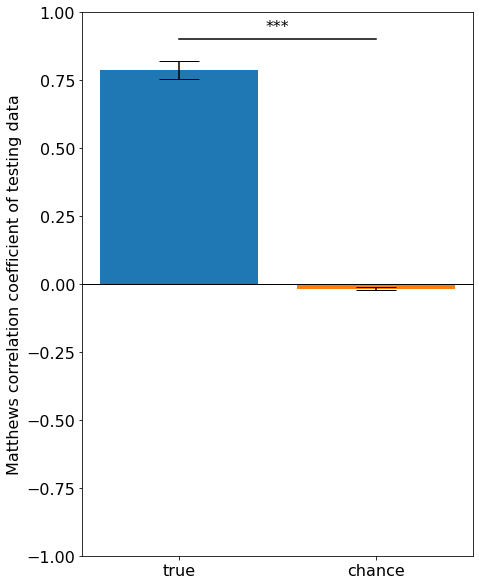

In [15]:
plt.figure(figsize=(7, 10))
plt.bar(0, np.mean(mcorrs))
plt.errorbar(0, np.mean(mcorrs), sem(mcorrs), fmt='k_', ms=0, capsize=20)

plt.bar(1, np.mean(mcorrs_boot))
plt.errorbar(1, np.mean(mcorrs_boot), sem(mcorrs_boot), fmt='k_', ms=0, capsize=20)

plt.plot(0, 0, 'k_', ms=2000)
plt.ylim(-1, 1)

plt.plot([0, 1], [0.9, 0.9], 'k')
plt.text(0.5, 0.93, '***', ha='center')

plt.ylabel('Matthews correlation coefficient of testing data')
plt.xticks([0, 1], ['true', 'chance'])
plt.savefig('./elife_figs/2Er.svg')

In [16]:
d = {}
d['mcorrs'] = np.array(mcorrs)
d['mcorrs_boot'] = mcorrs_boot
#sio.savemat('epmsvm_mcorrs.mat', d)